In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('datasets/merged_data_new.csv',encoding='gbk')
sz=pd.read_excel('datasets/深圳历史天气数据2012-2017.xlsx')
df=df[df['纬度']>=22.447837]
df=df[df['纬度']<=22.864748]
df=df[df['经度']>=113.75194]
df=df[df['经度']<=114.624187]
df_sz=df
df_sz['时间']=pd.to_datetime(df_sz['时间']).dt.date
df_sz.rename(columns={'时间': '日期'}, inplace=True)
sz['日期']=sz['日期'].astype(str)
sz['日期']=[i[:10] for i in sz['日期']]
df_sz['日期']=pd.to_datetime(df_sz['日期'])
sz['日期']=pd.to_datetime(sz['日期'])
df_sz=df_sz.merge(sz,on=['日期'],how='left')
df_sz.to_csv('sz.csv',encoding='gbk')

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/深圳历史天气数据2012-2017.xlsx'

In [3]:
import requests
from lxml import etree
import pandas as pd

def get_html(city, month):
    headers = {
        "Accept-Encoding": "Gzip",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36",
    }
    url = f'https://lishi.tianqi.com/{city}/{month}.html'
    
    r = requests.get(url, headers=headers)
    r_html = etree.HTML(r.text)
    
    return r_html

# 城市列表
cities = [
    'guangzhou', 'zhuhai', 'shantou', 'shaoguan', 'foshan',
    'jiangmen', 'zhanjiang', 'maoming', 'zhaoqing', 'huizhou',
    'meizhou', 'shanwei', 'heyuan', 'yangjiang', 'qingyuan',
    'dongguan', 'zhongshan', 'chaozhou', 'jieyang', 'yunfu'
]

# 月份参数列表
month_list = pd.period_range('201201', '201712', freq='M').strftime('%Y%m')

# 循环处理每个城市的数据
for city in cities:
    df = pd.DataFrame(columns=['日期', '最高气温', '最低气温', '天气'])
    for i, month in enumerate(month_list):
        r_html = get_html(city, month)
        divs = r_html.xpath('.//div[@class="tian_three"]')
        if divs:
            div = divs[0]
            lis = div.xpath('.//li')
            for li in lis:
                item = {
                    '日期': li.xpath('./div[@class="th200"]/text()')[0],
                    '最高气温': li.xpath('./div[@class="th140"]/text()')[0],
                    '最低气温': li.xpath('./div[@class="th140"]/text()')[1],
                    '天气': li.xpath('./div[@class="th140"]/text()')[2],
                }
                # 使用 pd.concat 替代 append
                df = pd.concat([df, pd.DataFrame([item])], ignore_index=True)
            print(f'{i + 1} 个月数据已采集 ({city})')
        else:
            print(f'未找到 {month} 的数据 ({city})')
    
    # 保存结果到 Excel 文件
    output_file = f'datasets\{city}_历史天气数据.xlsx'
    df.to_excel(output_file, index=None)
    print(f'Saved {output_file}')

1 个月数据已采集 (guangzhou)
2 个月数据已采集 (guangzhou)
3 个月数据已采集 (guangzhou)
4 个月数据已采集 (guangzhou)
5 个月数据已采集 (guangzhou)
6 个月数据已采集 (guangzhou)
7 个月数据已采集 (guangzhou)
8 个月数据已采集 (guangzhou)
9 个月数据已采集 (guangzhou)
10 个月数据已采集 (guangzhou)
11 个月数据已采集 (guangzhou)
12 个月数据已采集 (guangzhou)
13 个月数据已采集 (guangzhou)
14 个月数据已采集 (guangzhou)
15 个月数据已采集 (guangzhou)
16 个月数据已采集 (guangzhou)
17 个月数据已采集 (guangzhou)
18 个月数据已采集 (guangzhou)
19 个月数据已采集 (guangzhou)
20 个月数据已采集 (guangzhou)
21 个月数据已采集 (guangzhou)
22 个月数据已采集 (guangzhou)
23 个月数据已采集 (guangzhou)
24 个月数据已采集 (guangzhou)
25 个月数据已采集 (guangzhou)
26 个月数据已采集 (guangzhou)
27 个月数据已采集 (guangzhou)
28 个月数据已采集 (guangzhou)
29 个月数据已采集 (guangzhou)
30 个月数据已采集 (guangzhou)
31 个月数据已采集 (guangzhou)
未找到 201408 的数据 (guangzhou)
未找到 201409 的数据 (guangzhou)
未找到 201410 的数据 (guangzhou)
未找到 201411 的数据 (guangzhou)
未找到 201412 的数据 (guangzhou)
未找到 201501 的数据 (guangzhou)
未找到 201502 的数据 (guangzhou)
未找到 201503 的数据 (guangzhou)
未找到 201504 的数据 (guangzhou)
未找到 201505 的数据 (guangzhou)
未找到 201506 的数据 (guangzhou)

In [10]:
def process_city(city_name, lat_upper, lon_upper, lat_lower, lon_lower):
    # 读取数据
    df = pd.read_csv('datasets/merged_data_new.csv', encoding='gbk')
    sz = pd.read_excel(f'datasets/{city_name}_历史天气数据.xlsx')
    
    # 应用城市特定的筛选条件
    df_city = df[(df['纬度'] >= lat_lower) & (df['纬度'] <= lat_upper) & 
                 (df['经度'] >= lon_lower) & (df['经度'] <= lon_upper)]
    
    # 日期处理和合并操作
    df_city['时间'] = pd.to_datetime(df_city['时间']).dt.date
    df_city.rename(columns={'时间': '日期'}, inplace=True)
    sz['日期'] = sz['日期'].astype(str)
    sz['日期'] = [i[:10] for i in sz['日期']]
    df_city['日期'] = pd.to_datetime(df_city['日期'])
    sz['日期'] = pd.to_datetime(sz['日期'])
    df_city_merged = df_city.merge(sz, on=['日期'], how='left')
    df_city_merged.to_csv(f'{city_name}.csv',encoding='gbk')
    print(f"Processed {city_name} data")

# 定义各个城市的参数
cities = [
    ('guangzhou', 23.10647, 22.26763, 113.32446, 112.93853),
    ('zhuhai', 22.31983, 21.92717, 113.62446, 113.32446),
    ('shantou', 23.38163, 23.10647, 116.72817, 116.29861),
    ('shaoguan', 25.09663, 24.50421, 113.59361, 113.32446),
    ('foshan', 23.10647, 22.82861, 113.32446, 112.93853),
    ('jiangmen', 22.52847, 21.92717, 113.09861, 112.43853),
    ('zhanjiang', 21.27361, 20.75647, 110.32446, 109.64361),
    ('zhaoqing', 23.38163, 22.82861, 112.43853, 111.59361),
]

for city_name, lat_upper, lon_upper, lat_lower, lon_lower in cities:
    process_city(city_name, lat_upper, lon_upper, lat_lower, lon_lower)

print('All cities merged')

C:\Users\86153\AppData\Local\Temp\ipykernel_17972\1930532577.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city.rename(columns={'时间': '日期'}, inplace=True)
C:\Users\86153\AppData\Local\Temp\ipykernel_17972\1930532577.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city.rename(columns={'时间': '日期'}, inplace=True)


Processed guangzhou data
Processed zhuhai data


C:\Users\86153\AppData\Local\Temp\ipykernel_17972\1930532577.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city.rename(columns={'时间': '日期'}, inplace=True)
C:\Users\86153\AppData\Local\Temp\ipykernel_17972\1930532577.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city.rename(columns={'时间': '日期'}, inplace=True)
C:\Users\86153\AppData\Local\Temp\ipykernel_17972\1930532577.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

Processed shantou data
Processed shaoguan data
Processed foshan data


C:\Users\86153\AppData\Local\Temp\ipykernel_17972\1930532577.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city.rename(columns={'时间': '日期'}, inplace=True)
C:\Users\86153\AppData\Local\Temp\ipykernel_17972\1930532577.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city.rename(columns={'时间': '日期'}, inplace=True)


Processed jiangmen data
Processed zhanjiang data
Processed zhaoqing data
All cities merged


C:\Users\86153\AppData\Local\Temp\ipykernel_17972\1930532577.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city.rename(columns={'时间': '日期'}, inplace=True)


In [11]:
import requests
from lxml import etree
import pandas as pd

def get_html(city, month):
    headers = {
        "Accept-Encoding": "Gzip",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36",
    }
    url = f'https://lishi.tianqi.com/{city}/{month}.html'
    
    try:
        r = requests.get(url, headers=headers)
        r.raise_for_status()
        r_html = etree.HTML(r.text)
        return r_html
    except requests.RequestException as e:
        print(f"Request failed for {city} {month}: {e}")
        return None

# 省份城市列表
cities = {
    'guangxi': [
        'nanning', 'liuzhou', 'guilin', 'wuzhou', 'beihai',
        'fangchenggang', 'qinzhou', 'guigang', 'baise', 'hezhou',
        'hechi', 'laibin', 'chongzuo'
    ],
    'jiangxi': [
        'nanchang', 'jingdezhen', 'pingxiang', 'jiujiang', 'xinyu',
        'yingtan', 'ganzhi', 'yichun', 'fuzhou', 'shangrao'
    ],
    'fujian': [
        'fuzhou', 'xiamen', 'putian', 'sanming', 'quanzhou',
        'zhangzhou', 'nanping', 'longyan', 'ningde'
    ],
    'zhejiang': [
        'hangzhou', 'ningbo', 'wenzhou', 'jiaxing', 'huzhou',
        'shaoxing', 'jinhua', 'quzhou', 'zhoushan', 'taizhou',
        'lishui'
    ],
    'taiwan': [
        'taiwan'
    ],
    'anhui': [
        'hefei', 'wuhu', 'bengbu', 'huainan', 'maanshan',
        'huaibei', 'tongling', 'anqing', 'huangshan', 'chuzhou',
        'fuyang', 'suzhou', 'luan', 'bozhou', 'chizhou', 'xuancheng'
    ],
    'jiangsu': [
        'nanjing', 'wuxi', 'xuzhou', 'changzhou', 'suzhou',
        'nantong', 'lianyungang', 'huaian', 'yancheng', 'yangzhou',
        'zhenjiang', 'taizhou', 'suqian'
    ],
    'shanghai': [
        'shanghai'
    ],
    'shandong': [
        'jinan', 'qingdao', 'zibo', 'zaozhuang', 'dongying',
        'yantai', 'weifang', 'jining', 'taian', 'weihai',
        'rizhao', 'linyi', 'dezhou', 'liaocheng', 'binzhou', 'heze'
    ],
    'heilongjiang': [
        'harbin', 'qiqihar', 'jixi', 'hegang', 'shuangyashan',
        'daqing', 'yichun', 'jiamusi', 'qitaihe', 'mudanjiang',
        'heihe', 'suihua', 'daxinganling'
    ]
}

# 月份参数列表
month_list = pd.period_range('201201', '201712', freq='M').strftime('%Y%m')

# 循环处理每个省份的每个城市的数据
for province, province_cities in cities.items():
    for city in province_cities:
        df = pd.DataFrame(columns=['日期', '最高气温', '最低气温', '天气'])
        for i, month in enumerate(month_list):
            r_html = get_html(city, month)
            if r_html is not None:
                divs = r_html.xpath('.//div[@class="tian_three"]')
                if divs:
                    div = divs[0]
                    lis = div.xpath('.//li')
                    for li in lis:
                        item = {
                            '日期': li.xpath('./div[@class="th200"]/text()')[0],
                            '最高气温': li.xpath('./div[@class="th140"]/text()')[0],
                            '最低气温': li.xpath('./div[@class="th140"]/text()')[1],
                            '天气': li.xpath('./div[@class="th140"]/text()')[2],
                        }
                        df = pd.concat([df, pd.DataFrame([item])], ignore_index=True)
                    print(f'{i + 1} 个月数据已采集 ({city}, {province})')
                else:
                    print(f'未找到 {month} 的数据 ({city}, {province})')
        
        # 保存结果到 Excel 文件
        output_file = f'datasets\{province}省{city}_历史天气数据.xlsx'
        df.to_excel(output_file, index=None)
        print(f'Saved {output_file}')


1 个月数据已采集 (nanning, guangxi)
2 个月数据已采集 (nanning, guangxi)
3 个月数据已采集 (nanning, guangxi)
4 个月数据已采集 (nanning, guangxi)
5 个月数据已采集 (nanning, guangxi)
6 个月数据已采集 (nanning, guangxi)
7 个月数据已采集 (nanning, guangxi)
8 个月数据已采集 (nanning, guangxi)
9 个月数据已采集 (nanning, guangxi)
10 个月数据已采集 (nanning, guangxi)
11 个月数据已采集 (nanning, guangxi)
12 个月数据已采集 (nanning, guangxi)
13 个月数据已采集 (nanning, guangxi)
14 个月数据已采集 (nanning, guangxi)
15 个月数据已采集 (nanning, guangxi)
16 个月数据已采集 (nanning, guangxi)
17 个月数据已采集 (nanning, guangxi)
18 个月数据已采集 (nanning, guangxi)
19 个月数据已采集 (nanning, guangxi)
20 个月数据已采集 (nanning, guangxi)
21 个月数据已采集 (nanning, guangxi)
22 个月数据已采集 (nanning, guangxi)
23 个月数据已采集 (nanning, guangxi)
24 个月数据已采集 (nanning, guangxi)
25 个月数据已采集 (nanning, guangxi)
26 个月数据已采集 (nanning, guangxi)
27 个月数据已采集 (nanning, guangxi)
28 个月数据已采集 (nanning, guangxi)
29 个月数据已采集 (nanning, guangxi)
30 个月数据已采集 (nanning, guangxi)
未找到 201407 的数据 (nanning, guangxi)
未找到 201408 的数据 (nanning, guangxi)
未找到 201409 的数据 (nanning, guangxi)
未找到 201

In [8]:
def process_city(city_name, lat_upper, lon_upper, lat_lower, lon_lower):
    # 读取数据
    df = pd.read_csv('datasets/merged_data_new.csv', encoding='gbk')
    sz = pd.read_excel(f'guangxi省{city_name}_历史天气数据.xlsx')
    
    # 应用城市特定的筛选条件
    df_city = df[(df['纬度'] >= lat_lower) & (df['纬度'] <= lat_upper) & 
                 (df['经度'] >= lon_lower) & (df['经度'] <= lon_upper)]
    
    # 日期处理和合并操作
    df_city['时间'] = pd.to_datetime(df_city['时间']).dt.date
    df_city.rename(columns={'时间': '日期'}, inplace=True)
    sz['日期'] = sz['日期'].astype(str)
    sz['日期'] = [i[:10] for i in sz['日期']]
    df_city['日期'] = pd.to_datetime(df_city['日期'])
    sz['日期'] = pd.to_datetime(sz['日期'])
    df_city_merged = df_city.merge(sz, on=['日期'], how='left')
    df_city_merged.to_csv(f'{city_name}.csv',encoding='gbk')
    print(f"Processed {city_name} data")

# 定义各个城市的参数
cities = [
    ('wuzhou', 22.58, 24.10,111.51, 111.40),  # 梧州
    ('beihai', 21.47, 21.47,109.12, 109.12, ),  # 北海
    ('guilin', 25.24, 25.24,110.18, 110.18, ),  # 桂林
    ('liuzhou', 24.33, 24.33,109.42, 109.42, ),  # 柳州
    ('nanning', 22.13, 23.32,107.45, 108.51, ),  # 南宁
]


for city_name, lat_upper, lon_upper, lat_lower, lon_lower in cities:
    process_city(city_name, lat_upper, lon_upper, lat_lower, lon_lower)

print('All cities merged')

C:\Users\86153\AppData\Local\Temp\ipykernel_13984\110559255.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city.rename(columns={'时间': '日期'}, inplace=True)
C:\Users\86153\AppData\Local\Temp\ipykernel_13984\110559255.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city.rename(columns={'时间': '日期'}, inplace=True)


Processed wuzhou data
Processed beihai data


C:\Users\86153\AppData\Local\Temp\ipykernel_13984\110559255.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city.rename(columns={'时间': '日期'}, inplace=True)
C:\Users\86153\AppData\Local\Temp\ipykernel_13984\110559255.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city.rename(columns={'时间': '日期'}, inplace=True)


Processed guilin data
Processed liuzhou data
Processed nanning data
All cities merged


C:\Users\86153\AppData\Local\Temp\ipykernel_13984\110559255.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city.rename(columns={'时间': '日期'}, inplace=True)


In [3]:
sz_weather=pd.read_excel(r'D:\万天悦\大学\大三上\TimeSeries\TS-PW&TW-WTY\TS-TM-2-WTY\datasets\深圳历史天气数据2012-2017.xlsx')
sz_weather.head()

,日期,最高气温,最低气温,天气
0,2012-01-01,23℃,14℃,晴
1,2012-01-02,22℃,15℃,晴~多云
2,2012-01-03,19℃,11℃,多云~阴
3,2012-01-04,12℃,9℃,阴~小雨
4,2012-01-05,12℃,9℃,阴


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

sz_weather['日期'] = sz_weather['日期'].astype(str)
sz_weather['日期'] = [i[:10] for i in sz_weather['日期']]
sz_weather['日期'] = pd.to_datetime(sz_weather['日期'])

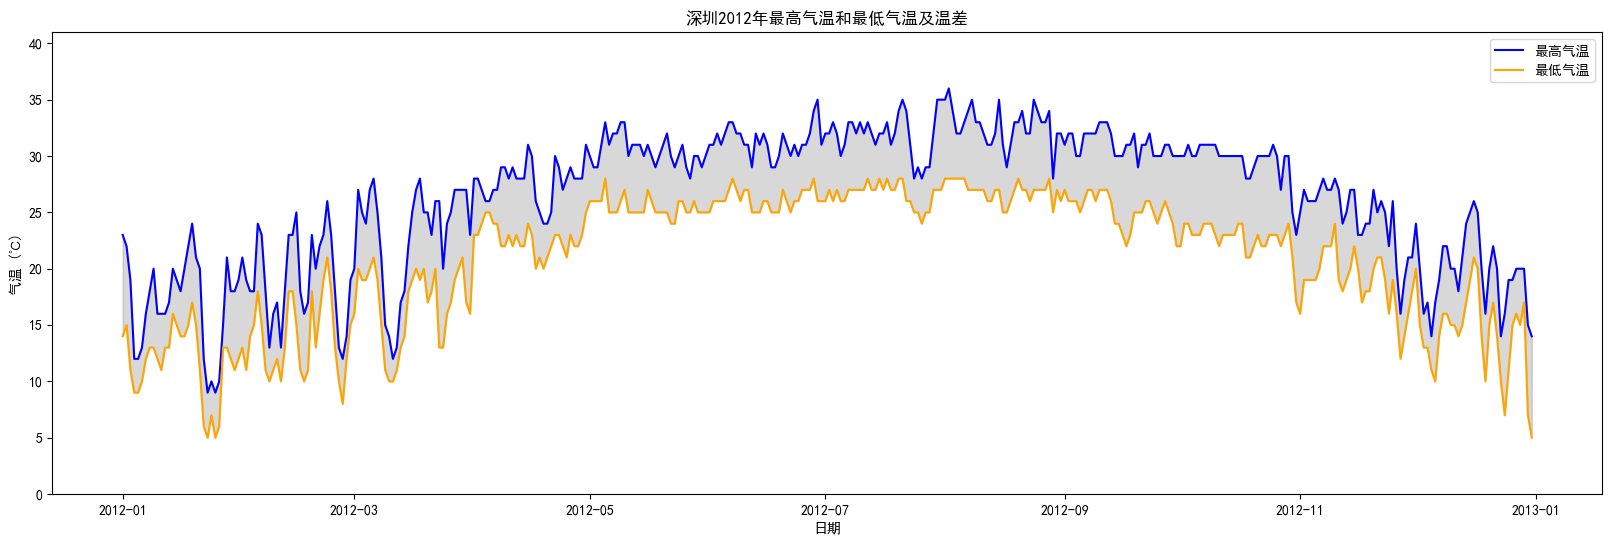

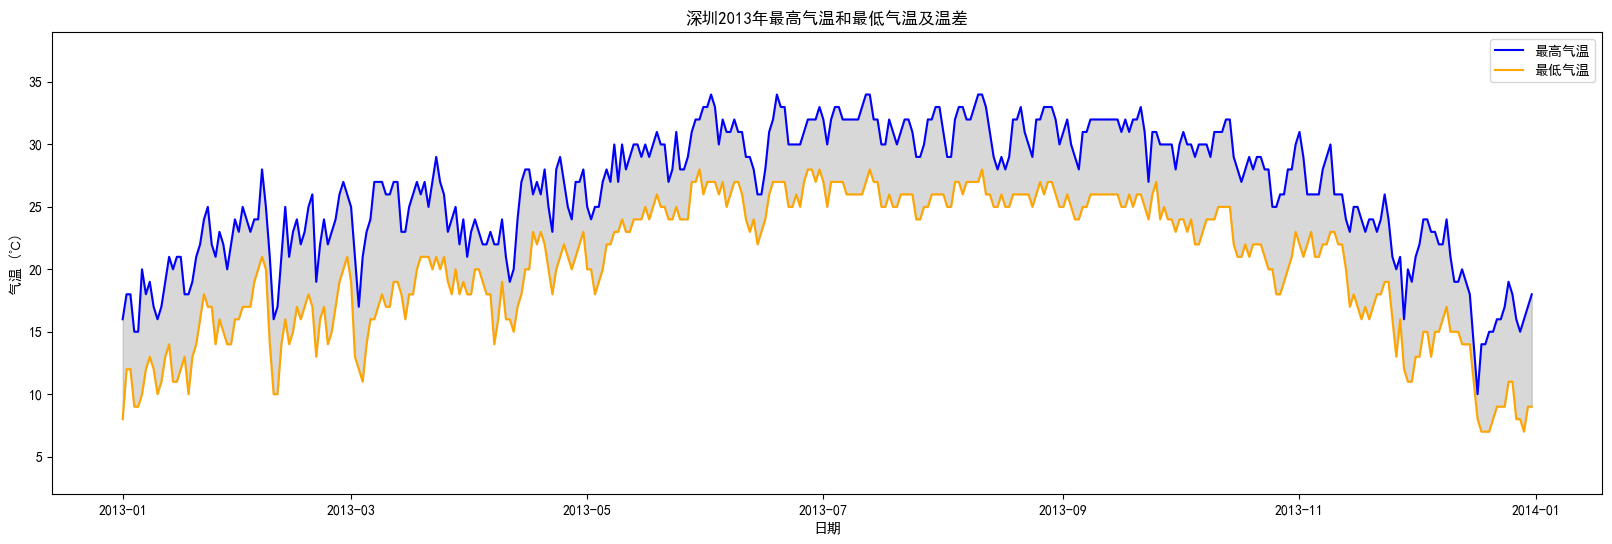

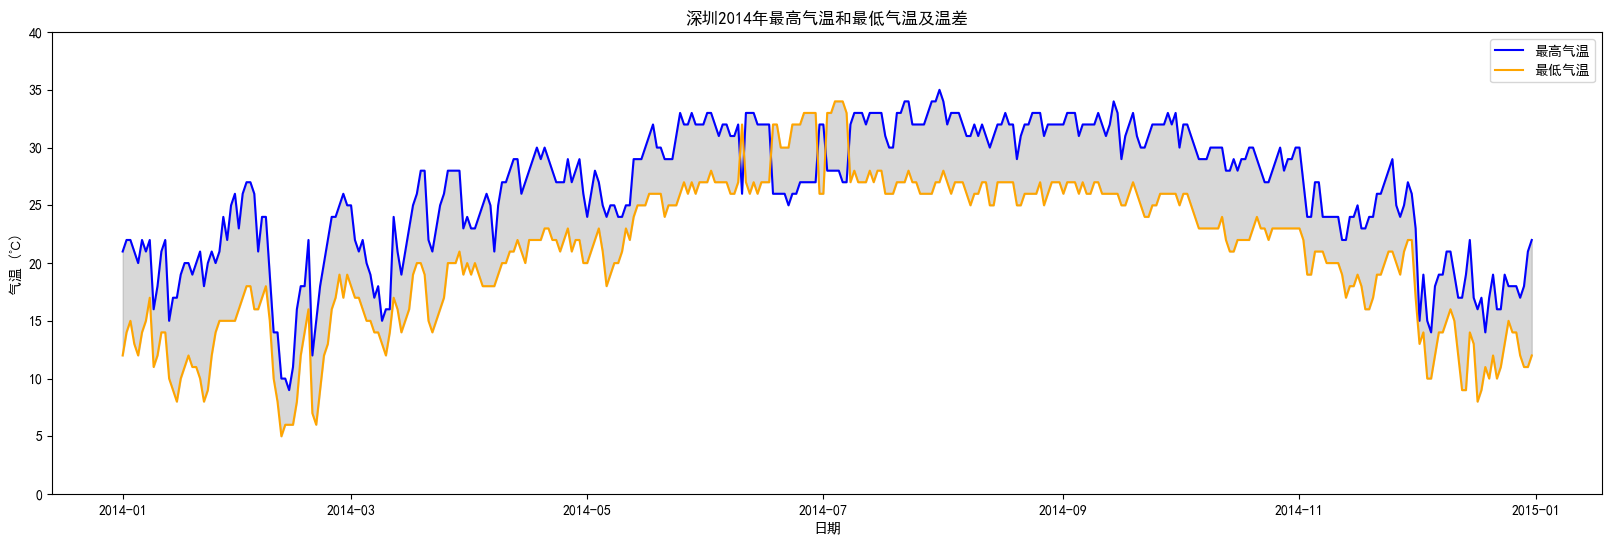

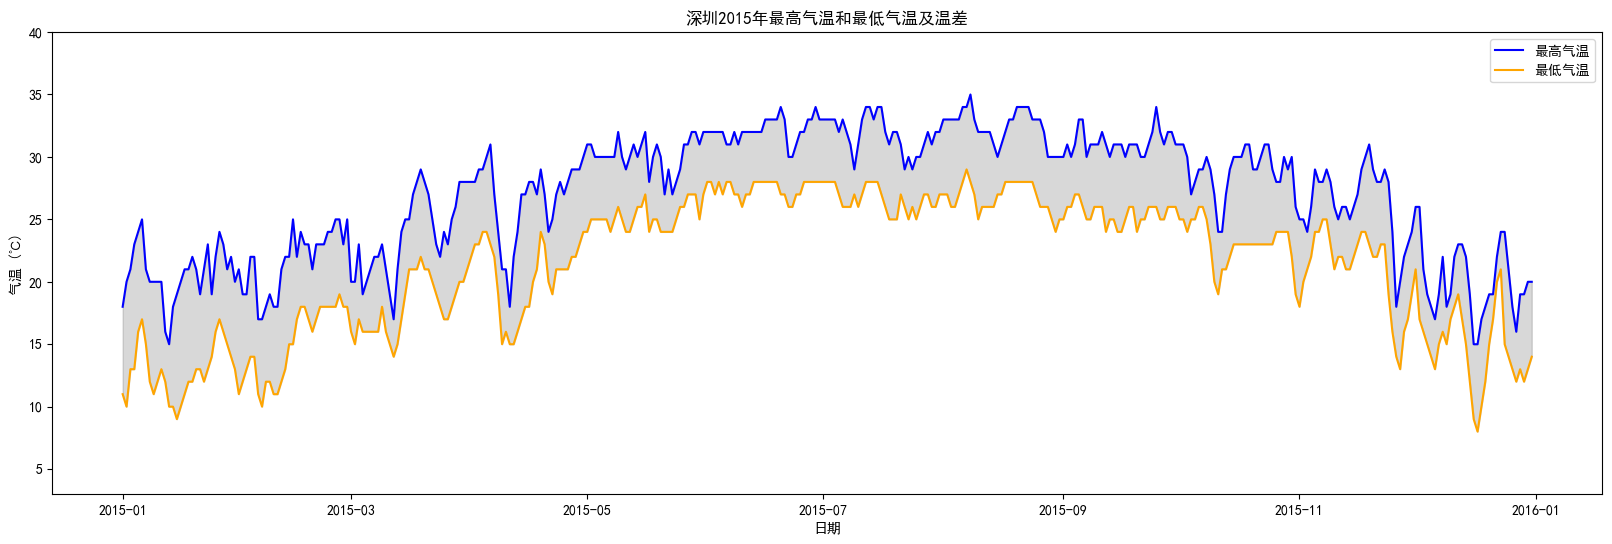

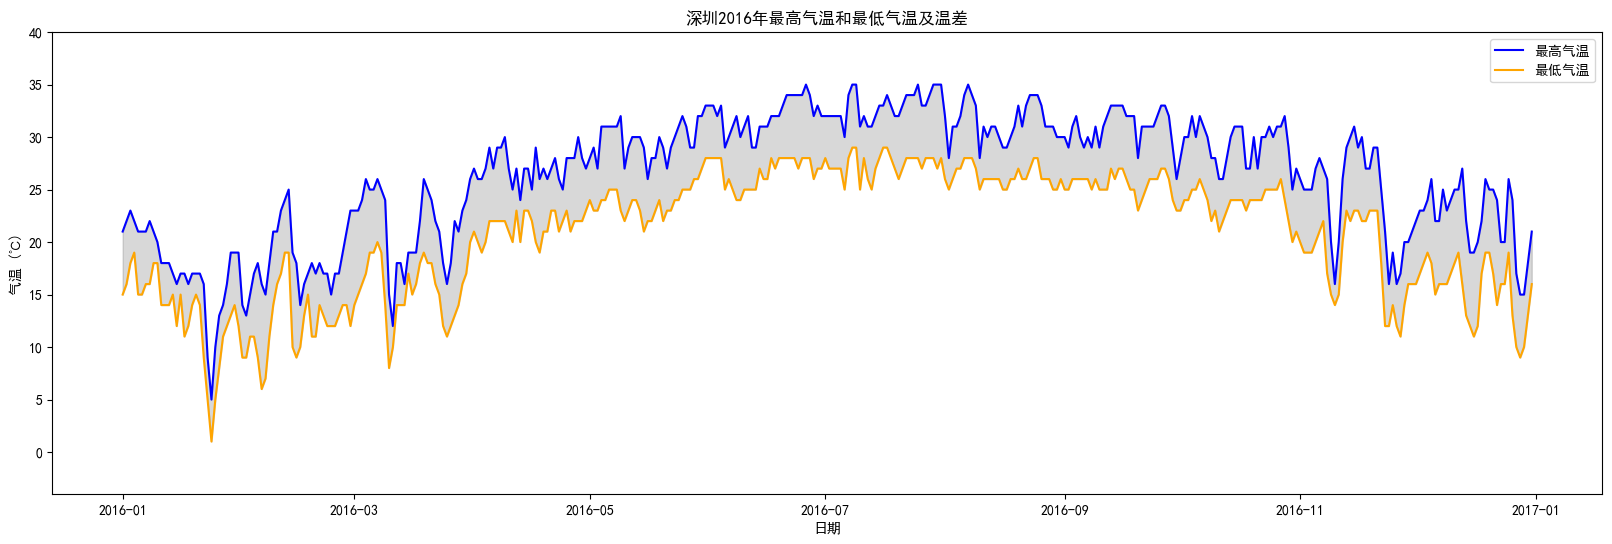

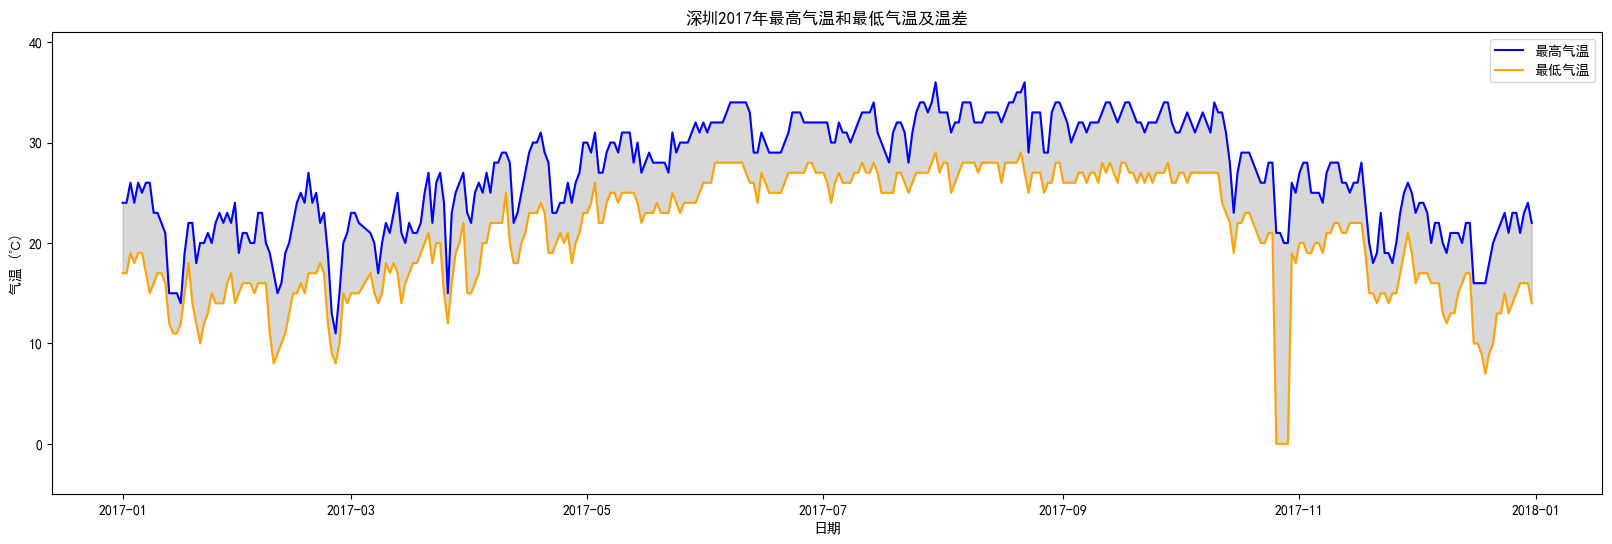

In [56]:
# 温度分布（总体）
# 按照日期排序
sz_weather = sz_weather.sort_values(by='日期')

# 获取所有年份
years = sz_weather['日期'].dt.year.unique()

# 按年分组并绘制折线图和温差条形图
for year in years:
    plt.figure(figsize=(20, 6))
    
    # 提取当年的数据
    yearly_data = sz_weather[sz_weather['日期'].dt.year == year]
    
    # 绘制最高气温
    plt.plot(yearly_data['日期'], yearly_data['最高气温'], label='最高气温', color='blue')
    
    # 绘制最低气温
    plt.plot(yearly_data['日期'], yearly_data['最低气温'], label='最低气温', color='orange')
    
    # 填充最高气温和最低气温之间的区域
    plt.fill_between(yearly_data['日期'], yearly_data['最低气温'], yearly_data['最高气温'], color='gray', alpha=0.3)
    
    # 设置纵坐标的范围
    min_temp = yearly_data['最低气温'][:-1].astype('int').min()
    max_temp = yearly_data['最高气温'][:-1].astype('int').max()
    plt.ylim(min_temp - 5, max_temp + 5)
    
    # 添加标题和标签
    plt.title(f'深圳{year}年最高气温和最低气温及温差')
    plt.xlabel('日期')
    plt.ylabel('气温 (℃)')
    plt.legend()
    
    # 显示图形
    plt.show()

In [5]:
data_weather_list = sz_weather['天气'].unique().tolist()
data_weather_list

['晴',
 '晴~多云',
 '多云~阴',
 '阴~小雨',
 '阴',
 '多云',
 '小雨',
 '小雨~阴',
 '小雨~多云',
 '阴~多云',
 '多云~晴',
 '阵雨~多云',
 '阵雨',
 '阵雨~小雨',
 '多云~阵雨',
 '多云转雷阵雨',
 '雷阵雨转阵雨',
 '雷阵雨转多云',
 '雷阵雨',
 '阵雨转雷阵雨',
 '中雨',
 '大雨',
 '大雨转暴雨',
 '中雨转多云',
 '阴转暴雨',
 '多云转阵雨',
 '大雨转阵雨',
 '多云转晴',
 '暴雨',
 '暴雨转雷阵雨',
 '雷阵雨转中雨',
 '大雨转中雨',
 '阵雨转多云',
 '雷阵雨转中到大雨',
 '大雨转雷阵雨',
 '雷阵雨转大雨',
 '中到大雨转阵雨',
 '阵雨转中雨',
 '多云转大到暴雨',
 '中到大雨',
 '多云转阴',
 '雷阵雨转暴雨',
 '中雨转暴雨',
 '大雨转小雨',
 '晴转多云',
 '多云转小雨',
 '小雨转中雨',
 '小雨转阴',
 '阵雨转小雨',
 '中雨转小雨',
 '阴转多云',
 '小雨转多云',
 '中雨转阵雨',
 '阵雨转大雨',
 '暴雨转阵雨',
 '阴转中雨',
 '阴转雷阵雨',
 '阴转小雨',
 '阵雨转暴雨',
 '多云转大雨',
 '大到暴雨转小雨',
 '小雨转阵雨',
 '阴转阵雨',
 '中雨转大雨',
 '暴雨转大雨',
 '暴雨转中雨',
 '霾转多云',
 '霾',
 '霾转阵雨',
 '阵雨转阴',
 '中雨转雷阵雨',
 '小雨转大雨',
 '中雨转中到大雨',
 '大雨转晴',
 '小雨~暴雨',
 '阵雨~雷雨',
 '雷雨~暴雨',
 '大到暴雨~暴雨',
 '阵雨~暴雨',
 '微风 小于3级',
 '大到暴雨~雷雨',
 '多云~雷雨',
 '雷雨',
 '阵雨~大雨',
 '中雨~雷雨',
 '中雨~阵雨',
 '中雨~雷阵雨',
 '阵雨~雷阵雨',
 '大雨~雷阵雨',
 '大雨~中雨',
 '阵雨~晴',
 '多云~雷阵雨',
 '小雨~阵雨',
 '多云~大雨',
 '雷阵雨~阵雨',
 '雷阵雨~大雨',
 '中雨~暴雨',
 '大雨~暴雨',
 '阵雨~大到暴雨',
 '多云~小雨',
 '多云~中雨',
 '中雨~大雨',
 

In [8]:
# 定义主要天气类别
weather_categories = {
    '晴天': ['晴', '晴~多云', '多云~晴', '晴~阴'],
    '雨天': ['小雨', '小雨~阴', '小雨~多云', '阵雨', '阵雨~小雨', '阵雨~多云', '阵雨转雷阵雨', '雷阵雨转阵雨', '雷阵雨转多云', '雷阵雨', '阵雨转雷阵雨', '阵雨转多云', '阵雨~大雨', '阵雨~雷雨', '雷雨', '阵雨~暴雨', '雷阵雨转中雨', '雷阵雨转大雨', '雷阵雨转中到大雨', '雷阵雨转暴雨', '雷阵雨~大暴雨', '雷阵雨~暴雨', '雷阵雨~大到暴雨', '雷阵雨~大暴雨'],
    '阴天': ['阴', '阴~小雨', '阴~多云', '多云~阴', '阴转多云', '阴转小雨', '阴转暴雨', '阴转雷阵雨', '阴转阵雨', '阴转中雨'],
    '其他': [weather for weather in df['天气'].unique() if weather not in weather_categories['晴天'] + weather_categories['雨天'] + weather_categories['阴天']]
}

# 生成一个颜色列表，确保颜色数量至少为类别数量
colors = plt.cm.Set1(np.linspace(0, 1, len(weather_categories)))

# 创建一个颜色映射字典，为每个天气类别分配一个颜色
weather_category_color_map = {category: color for category, color in zip(weather_categories.keys(), colors)}

# 为每个天气状况分配一个颜色
weather_color_map = {}
for category, conditions in weather_categories.items():
    for condition in conditions:
        weather_color_map[condition] = weather_category_color_map[category]

# 添加日期序号列
year = 2012
df.loc[:, '日期序号'] = (df['日期'] - pd.Timestamp(year, 1, 1)).dt.days

# 打印 DataFrame
print(df)

# 绘制条形图
fig, ax = plt.subplots(figsize=(10, 5))

# 由于条形图通常需要数值，我们随机生成一些数值来表示每个天气状况
# 实际应用中，这些数值可能代表某种天气出现的频率或其他指标
weather_values = np.random.rand(len(df))

# 创建条形图
bars = ax.bar(df['日期'], weather_values, color=[weather_color_map.get(weather, 'gray') for weather in df['天气']])

# 设置图表标题和标签
ax.set_title('天气状况与颜色对应')
ax.set_xlabel('日期')
ax.set_ylabel('随机值（仅用于示例）')

# 显示图表
plt.xticks(rotation=45)  # 旋转 x 轴标签以避免重叠
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

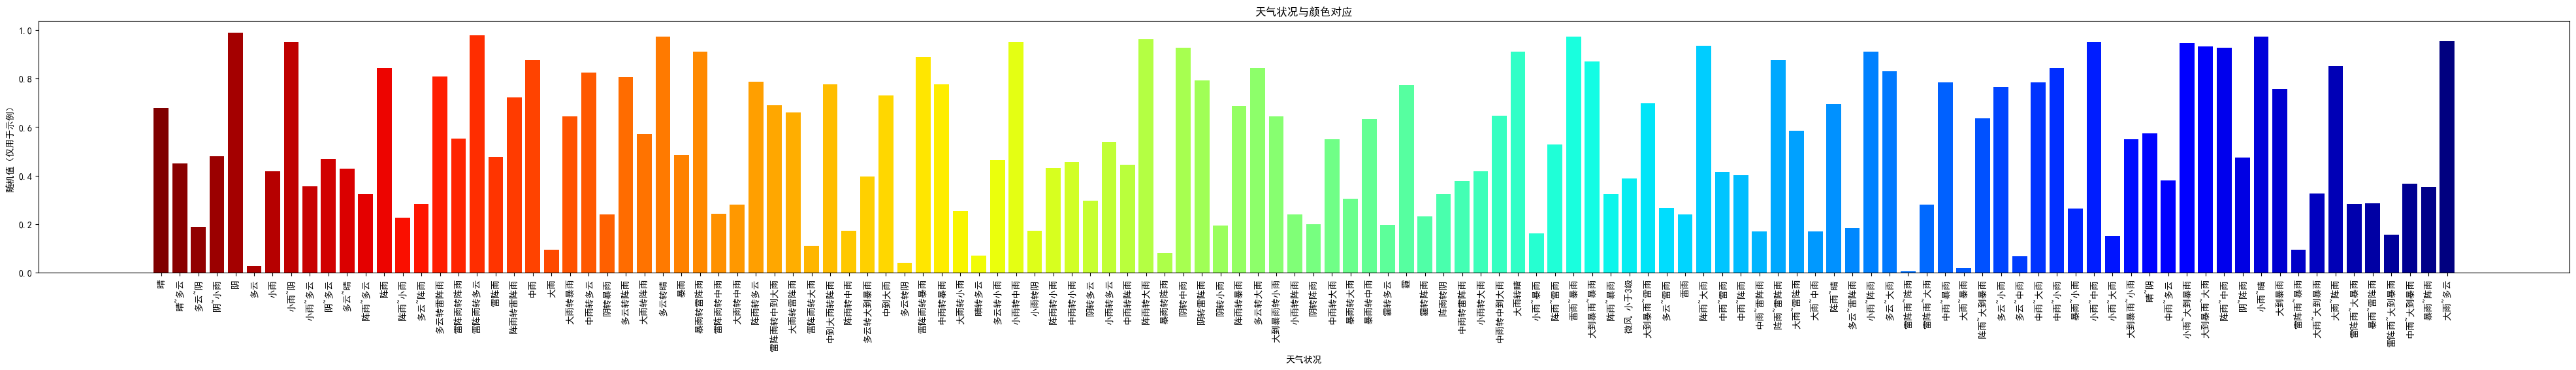

In [81]:
data_weather_list = sz_weather['天气'].unique().tolist()
# 生成一个颜色列表，确保颜色数量至少为124
colors = plt.cm.jet(np.linspace(0, 1, 124))
# 创建一个颜色映射字典，为每个天气状况分配一个颜色
weather_color_map = {weather: color for weather, color in zip(data_weather_list[::-1], colors)}

# 创建一个简单的条形图来显示天气状况和对应的颜色
fig, ax = plt.subplots(figsize=(50, 5))

# 由于条形图通常需要数值，我们随机生成一些数值来表示每个天气状况
# 实际应用中，这些数值可能代表某种天气出现的频率或其他指标
weather_values = np.random.rand(len(data_weather_list))

# 创建条形图
bars = ax.bar(data_weather_list, weather_values, color=[weather_color_map[weather] for weather in data_weather_list])

# 设置图表标题和标签
ax.set_title('天气状况与颜色对应')
ax.set_xlabel('天气状况')
ax.set_ylabel('随机值（仅用于示例）')

# 由于天气状况名称可能过长，我们将其旋转90度以便于阅读
plt.xticks(rotation=90)

# 显示图表
plt.show()


C:\Users\86153\AppData\Local\Temp\ipykernel_13984\4143278556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['日期序号'] = (yearly_data['日期'] - pd.Timestamp(year, 1, 1)).dt.days


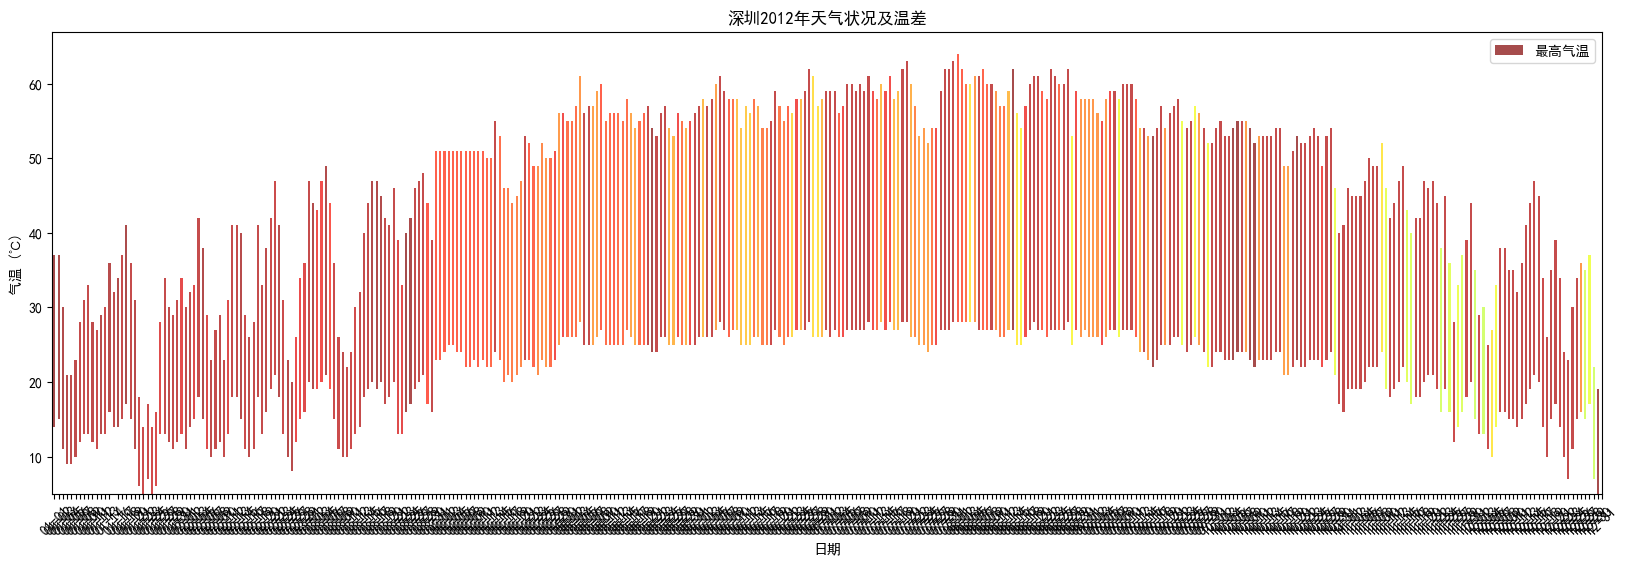

C:\Users\86153\AppData\Local\Temp\ipykernel_13984\4143278556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['日期序号'] = (yearly_data['日期'] - pd.Timestamp(year, 1, 1)).dt.days


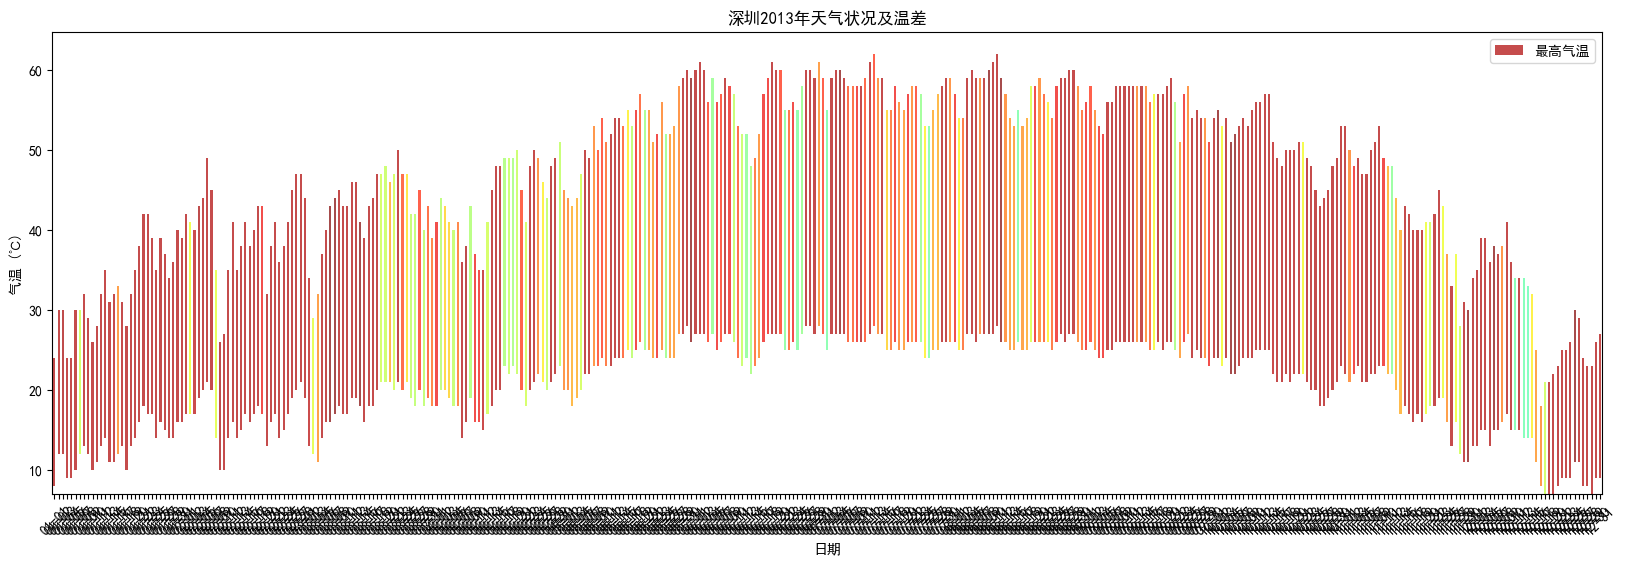

C:\Users\86153\AppData\Local\Temp\ipykernel_13984\4143278556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['日期序号'] = (yearly_data['日期'] - pd.Timestamp(year, 1, 1)).dt.days


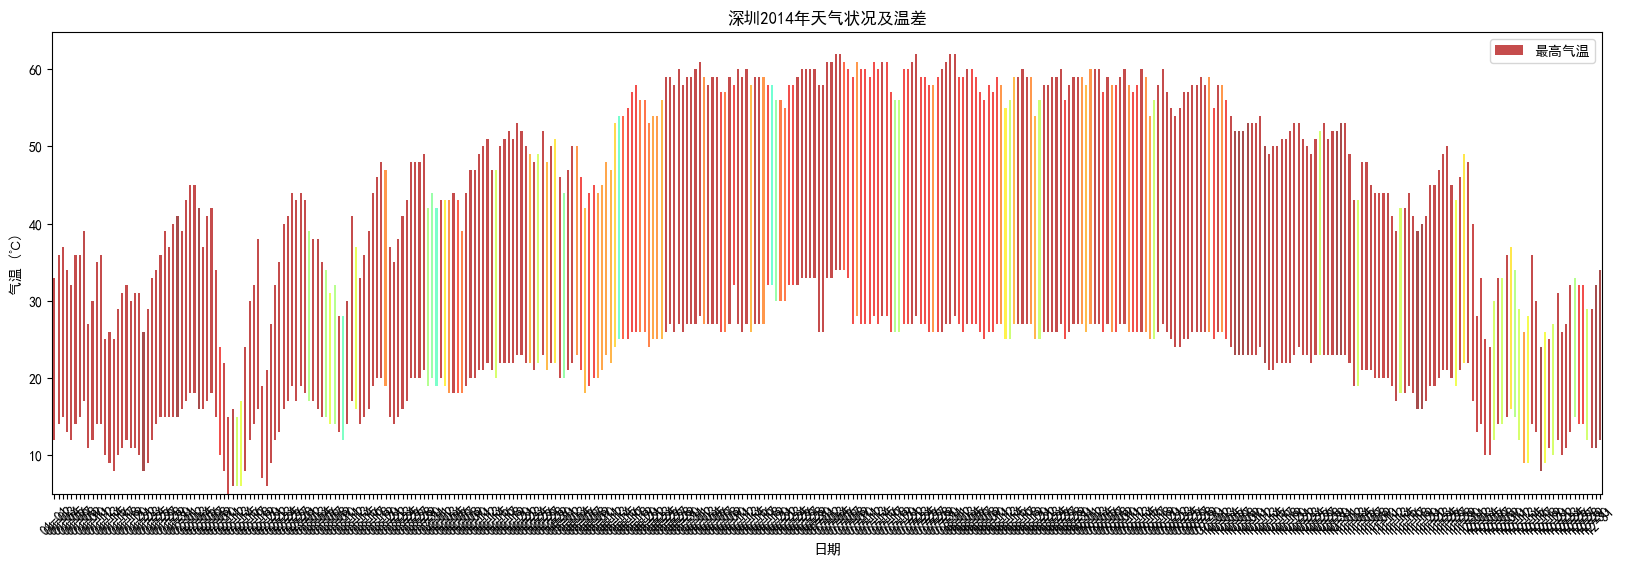

C:\Users\86153\AppData\Local\Temp\ipykernel_13984\4143278556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['日期序号'] = (yearly_data['日期'] - pd.Timestamp(year, 1, 1)).dt.days


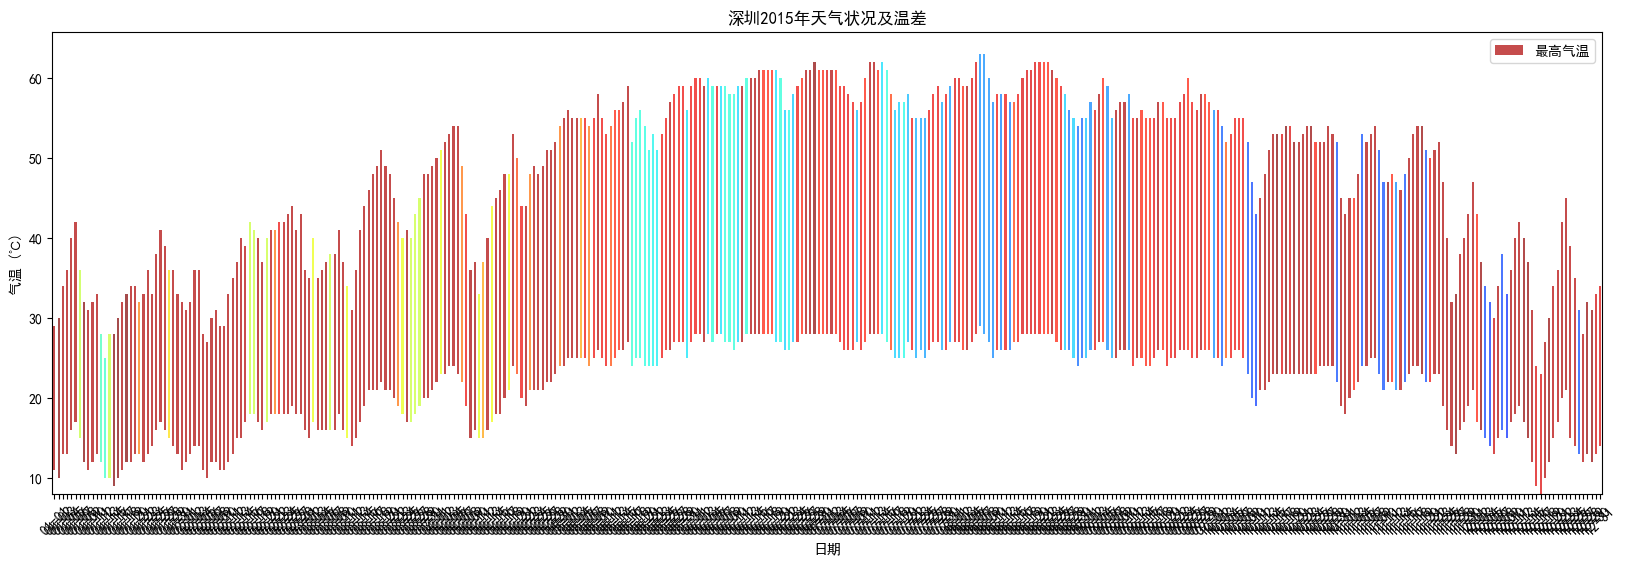

C:\Users\86153\AppData\Local\Temp\ipykernel_13984\4143278556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['日期序号'] = (yearly_data['日期'] - pd.Timestamp(year, 1, 1)).dt.days


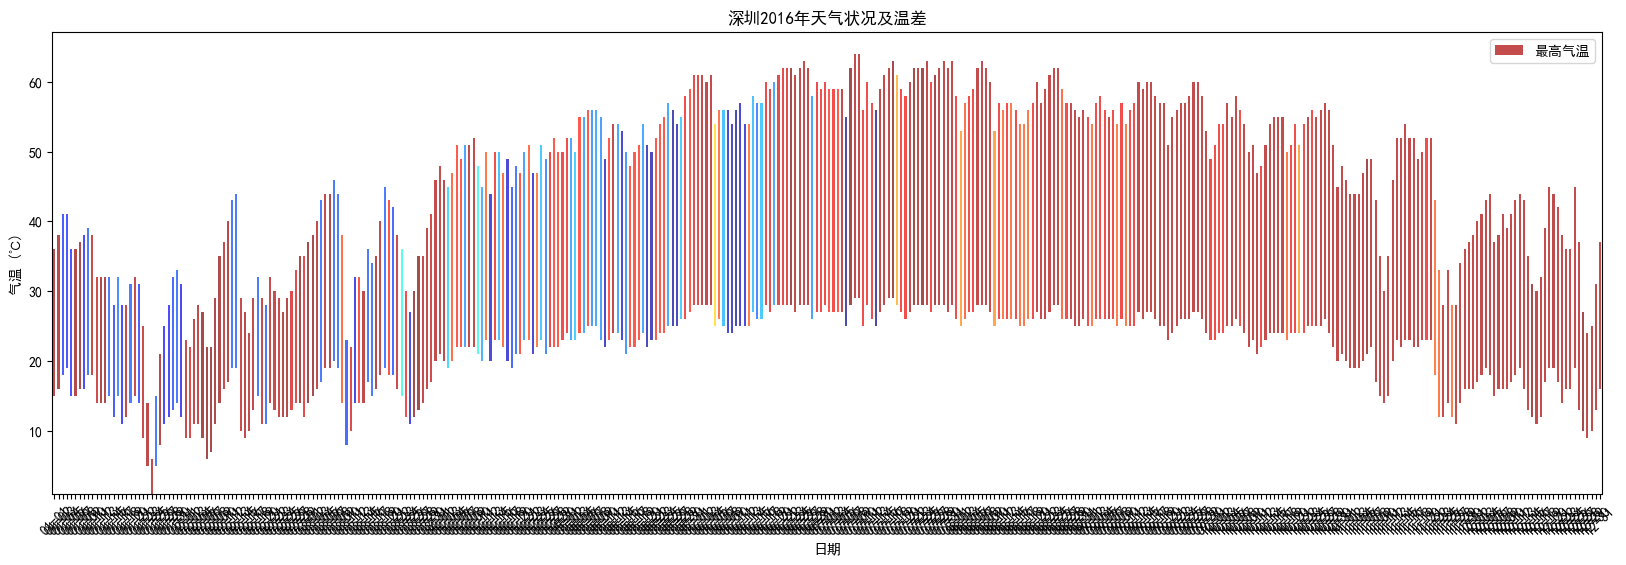

C:\Users\86153\AppData\Local\Temp\ipykernel_13984\4143278556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['日期序号'] = (yearly_data['日期'] - pd.Timestamp(year, 1, 1)).dt.days


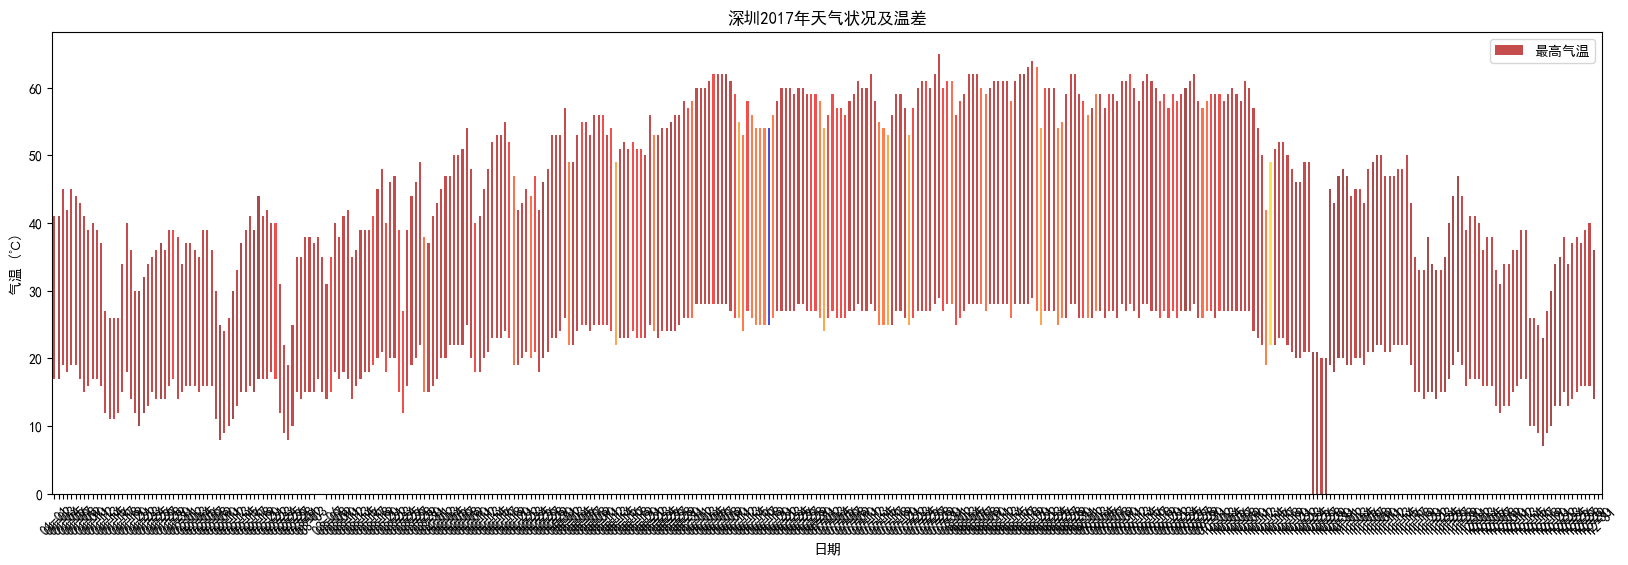

In [83]:
sz_weather['天气颜色'] = sz_weather['天气'].map(weather_color_map)

# 处理 '天气颜色' 列中的 NaN 值
sz_weather['天气颜色'].fillna('gray', inplace=True)
years = sz_weather['日期'].dt.year.unique()

for year in years:
    plt.figure(figsize=(20, 6))
    
    yearly_data = sz_weather[sz_weather['日期'].dt.year == year]
    yearly_data['日期序号'] = (yearly_data['日期'] - pd.Timestamp(year, 1, 1)).dt.days
    
    # 绘制条形图
    yearly_data.plot.bar(x='日期序号', y='最高气温', color=yearly_data['天气颜色'], alpha=0.7, bottom=yearly_data['最低气温'], ax=plt.gca())
    
    plt.title(f'深圳{year}年天气状况及温差')
    plt.xlabel('日期')
    plt.ylabel('气温 (℃)')
    plt.xticks(ticks=yearly_data['日期序号'], labels=yearly_data['日期'].dt.strftime('%m-%d'), rotation=45)    
    plt.show()

C:\Users\86153\AppData\Local\Temp\ipykernel_13984\3742726213.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['日期序号'] = yearly_data['日期'].dt.strftime('%m-%d')


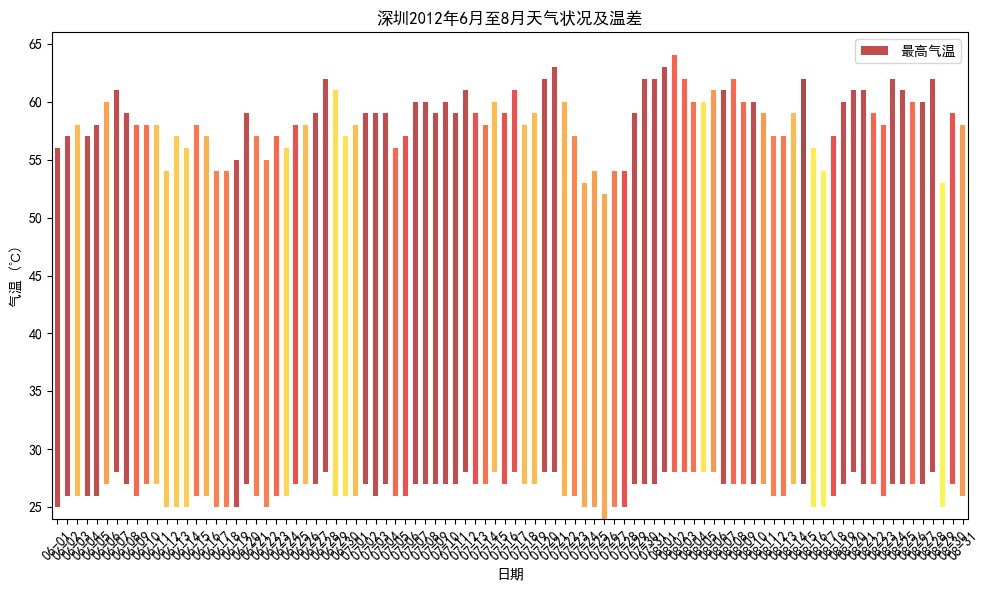

C:\Users\86153\AppData\Local\Temp\ipykernel_13984\3742726213.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['日期序号'] = yearly_data['日期'].dt.strftime('%m-%d')


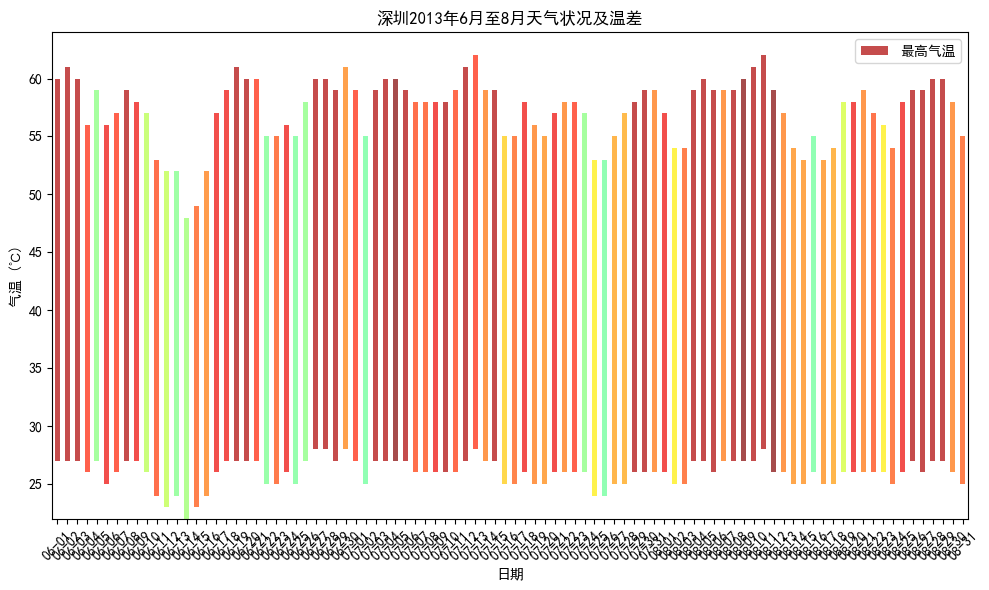

C:\Users\86153\AppData\Local\Temp\ipykernel_13984\3742726213.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['日期序号'] = yearly_data['日期'].dt.strftime('%m-%d')


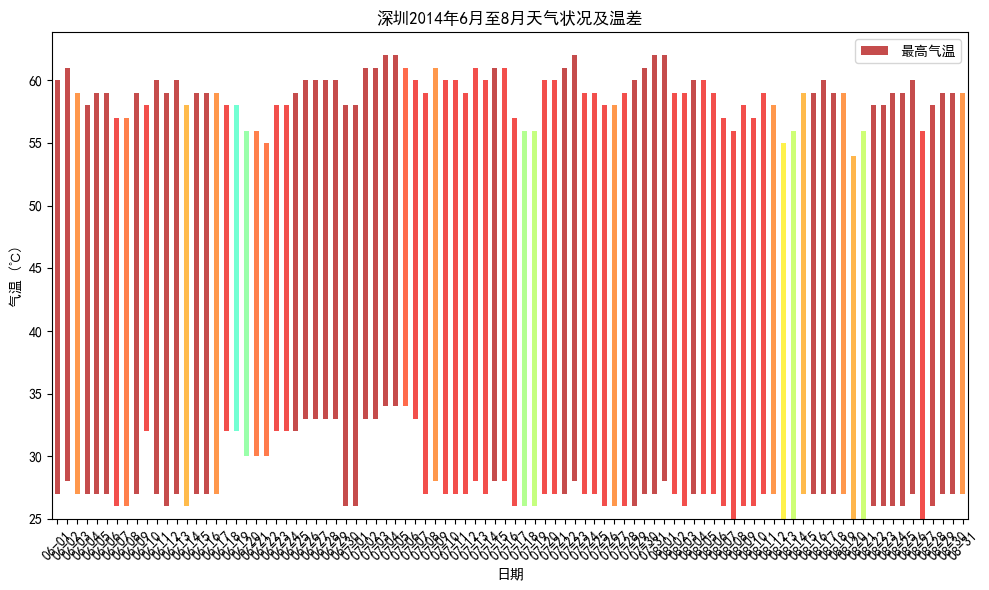

C:\Users\86153\AppData\Local\Temp\ipykernel_13984\3742726213.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['日期序号'] = yearly_data['日期'].dt.strftime('%m-%d')


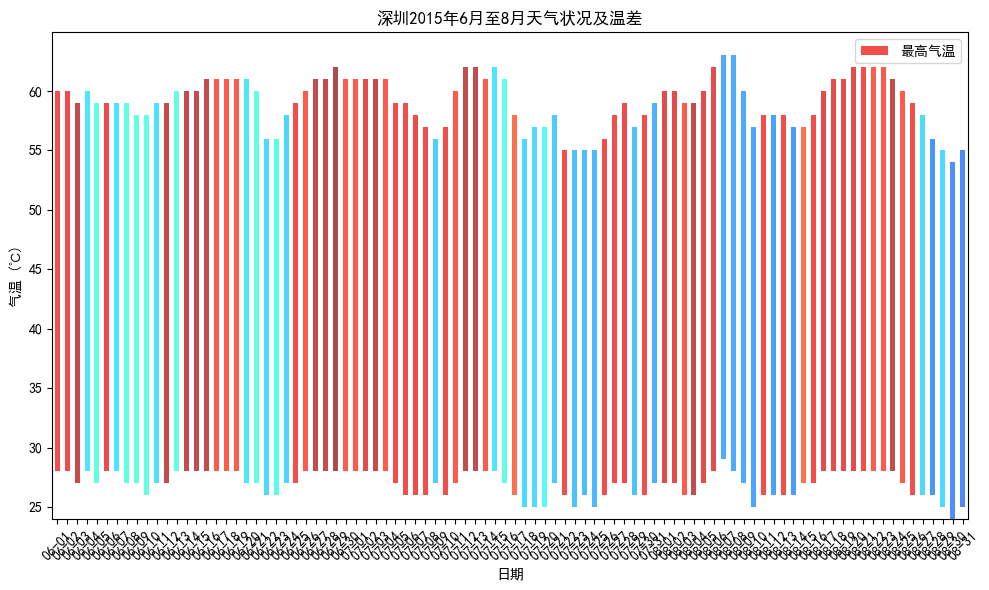

C:\Users\86153\AppData\Local\Temp\ipykernel_13984\3742726213.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['日期序号'] = yearly_data['日期'].dt.strftime('%m-%d')


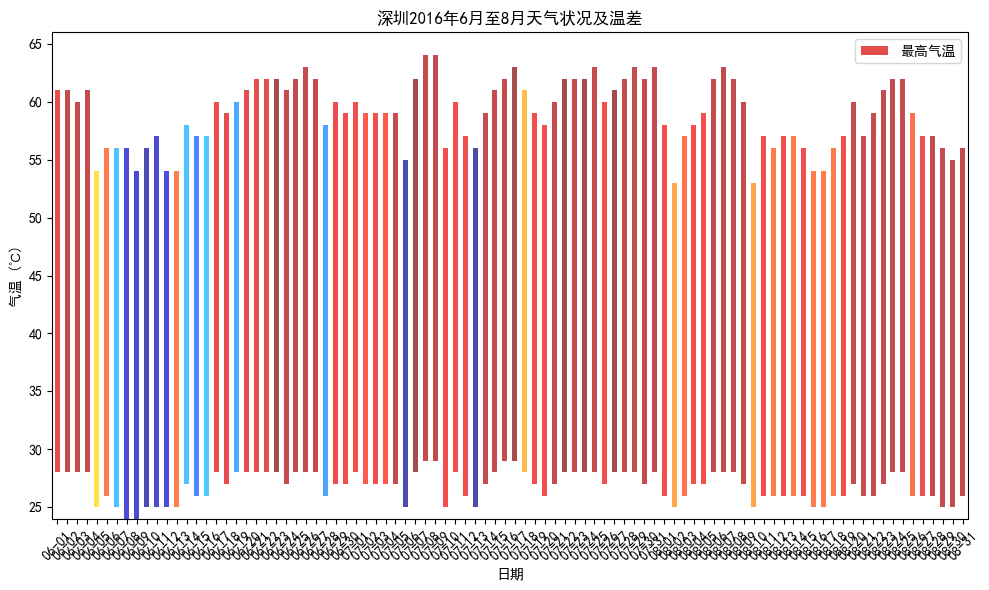

C:\Users\86153\AppData\Local\Temp\ipykernel_13984\3742726213.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['日期序号'] = yearly_data['日期'].dt.strftime('%m-%d')


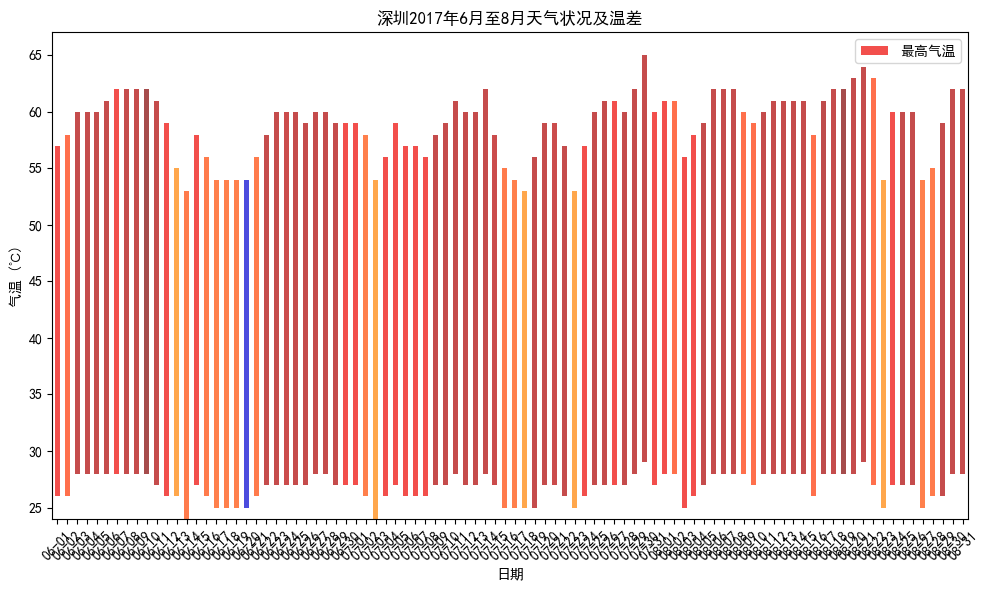

In [88]:
for year in years:
    plt.figure(figsize=(10, 6))
    
    # 只选择6月、7月和8月的数据
    yearly_data = sz_weather[(sz_weather['日期'].dt.year == year) & (sz_weather['日期'].dt.month.isin([6, 7, 8]))]
    
    # 使用月份和日期作为 x 轴标签
    yearly_data['日期序号'] = yearly_data['日期'].dt.strftime('%m-%d')
    
    # 绘制条形图
    yearly_data.plot.bar(x='日期序号', y='最高气温', color=yearly_data['天气颜色'], alpha=0.7, bottom=yearly_data['最低气温'], ax=plt.gca())
    
    plt.title(f'深圳{year}年6月至8月天气状况及温差')
    plt.xlabel('日期')
    plt.ylabel('气温 (℃)')
    plt.xticks(rotation=45)    
    plt.tight_layout()
    plt.show()

In [3]:
import pandas as pd
df=pd.read_csv('datasets/广东_maped.csv',encoding='gbk')
df.head()


,Unnamed: 0.1,Unnamed: 0,日期,年,月,日,小时,强度标记,纬度,经度,...,降雨量等级,form_dt,dispear_dt,peak_dt,lifespan,path_length,impact_area,最高气温,最低气温,天气
0,0,2950,2015-07-09,2015,7,9,12,2,22.8,114.3,...,1,2015-07-01 18:00:00,2015-07-09 18:00:00,2015-07-08 18:00:00,691200.0,2361.447505,251586.006507,29℃,27℃,中雨~阵雨
1,1,4510,2017-06-12,2017,6,12,15,3,22.5,114.5,...,1,2017-06-10 00:00:00,2017-06-13 18:00:00,2017-06-12 06:00:00,324000.0,1891.439668,166112.760107,33℃,26℃,阵雨
